In [1]:
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time

Using TensorFlow backend.


## Creating a Keras Model

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 11,290
Trainable params: 11,290
Non-trainable params: 0
_________________________________________________________________


## 2'nd way to create a Keras model

In [3]:
input_layer = Input(shape=(32, 32, 3))
conv2d_1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
maxpool_1 = MaxPool2D()(conv2d_1)
conv2d_2 = Conv2D(16, (3, 3), activation='relu')(maxpool_1)
maxpool_2 = MaxPool2D()(conv2d_2)
flatten = Flatten()(maxpool_2)
dense = Dense(10, activation='softmax')(flatten)

model = Model(inputs=input_layer, outputs=dense)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5770      
Total para

## Creating a toy data

In [4]:
data = []
for i in range(1000):
    x1 = np.random.randint(low=1, high=200)
    x2 = np.random.randint(low=1, high=200)
    if x1 < x2:
        data.append([x1,x2,1])
    else:
        data.append([x1,x2,0])

In [5]:
data_f = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])
data_f.head()

,x1,x2,y
0,17,50,1
1,77,72,0
2,72,125,1
3,114,48,0
4,24,92,1


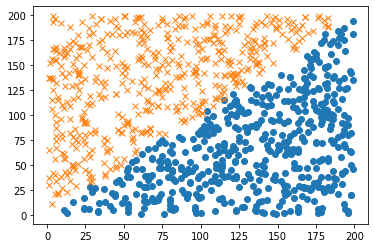

In [6]:
plt.plot(data_f[data_f.y==0].x1, data_f[data_f.y==0].x2, 'o')
plt.plot(data_f[data_f.y==1].x1, data_f[data_f.y==1].x2, 'x')

In [7]:
M = data_f.values
X = M[:,:-1]
y = M[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train.shape

(670, 2)

## Creating the model

In [8]:
# Network Architecture
model = models.Sequential()

# Layer id the building block for Neural Networks
model.add(layers.Dense(2, activation='sigmoid', input_shape = (2,)))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(16,activation='sigmoid'))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation Step
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_train

array([[150,  70],
       [147,  83],
       [ 18, 145],
       ...,
       [ 58,  55],
       [115,  12],
       [ 70, 159]])

## Evaluating model

In [9]:
%%time
model.fit(X_train, y_train, batch_size=1, epochs=10, verbose = 0)

CPU times: user 47.1 s, sys: 3.98 s, total: 51.1 s
Wall time: 24.4 s


In [10]:
y_pred = 1 * (model.predict(X_test) > 0.5)
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print('Accuracy on Test Data:{:.3}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[149  21]
 [  0 160]]
Accuracy on Test Data:0.936


In [11]:
51.1/10

5.11